In [14]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [15]:
DATA_PATH = "/home/brandon/Documents/Data Science/Final-Project-Climate-Change/"
global_temperatures = pd.read_csv(DATA_PATH + "GlobalLandTemperaturesByCountry.csv", parse_dates=['dt'])

global_temperatures['dt'] = global_temperatures['dt'].apply(lambda x: x.year)
global_temperatures.columns = ['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']
  
global_temperatures.head()

,Year,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743,4.384,2.294,Åland
1,1743,NaN,NaN,Åland
2,1744,NaN,NaN,Åland
3,1744,NaN,NaN,Åland
4,1744,NaN,NaN,Åland


In [18]:
dates = global_temperatures['Year'].drop_duplicates().values
temps = global_temperatures.groupby(['Year']).mean()['AverageTemperature'].values

# Extract the last 30 years
dates = dates[-30:]
temps = temps[-30:]

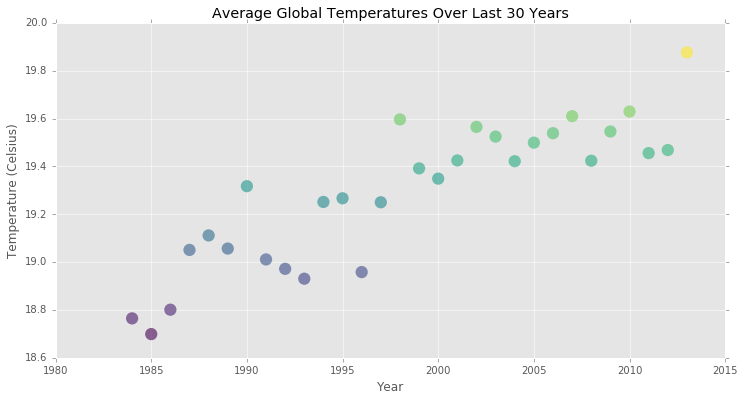

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(dates, temps, c=temps, s = 150, alpha=0.6, edgecolors='none', cmap='viridis')
plt.grid(True)
plt.title("Average Global Temperatures Over Last 30 Years")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

In [22]:
# create linear regression model
lr = lm.LinearRegression()

# fit model to our training set
# numpy newaxis converts an array into a column vector
# conventionally, obcservations are rows and features are columns
lr.fit(dates[:, np.newaxis], temps)

# predict points
temps_lr = lr.predict(dates[:, np.newaxis])

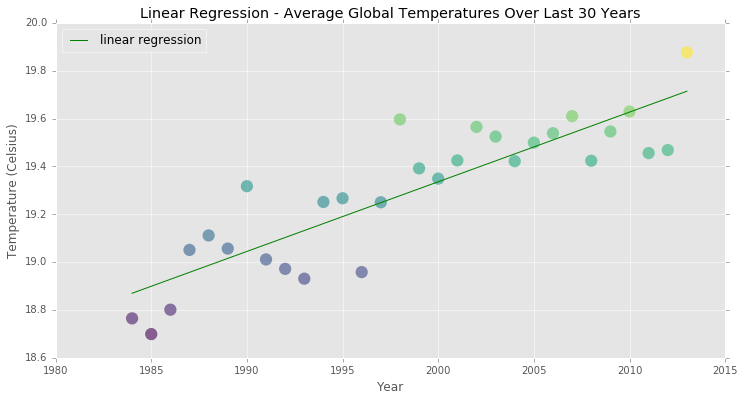

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(dates, temps, c=temps, s = 150, alpha=0.6, edgecolors='none', cmap='viridis')
plt.plot(dates, temps_lr, c='green', label='linear regression')
plt.legend(loc=2)
plt.grid(True)
plt.title("Linear Regression - Average Global Temperatures Over Last 30 Years")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

## Ridge Regression

### One useful technique is to create a Vandermonde matrix using numpy vander()
For example, numpy.vander([1, 2, 3], 3) applies vander to a array [1, 2, 3] with degree 3, and returns the 3x4 matrix: 

    [1^3, 1^2, 1^1, 1^0]

    [2^3, 2^2, 2^1, 2^0]

    [3^3, 3^2, 3^1, 3^0]

In [ ]:
# TODO